# Titanic Data Analysis
*Author: Yanjie Zheng*  
*Penn State University - DS 220 - Project 2*  

# Reasons for choosing this data
Personal interest in boats and in sailing. Also because the Titanic movie got me interested in the event.

# Dataset Description
The dataset includes information on passengers aboard the Titanic, such as:
- **Survival** (0 = No, 1 = Yes)
- **Pclass** (Ticket class: 1st, 2nd, 3rd)
- **Sex**
- **Age**
- **SibSp** (Number of siblings/spouses aboard)
- **Parch** (Number of parents/children aboard)
- **Fare**
- **Embarked** (Port of Embarkation)

# Questions to Answer
1. What percentage of passengers survived?
2. Did women have a higher survival rate than men?
3. How did passenger class affect survival rate?
4. Were younger passengers more likely to survive?
5. Did the number of family members onboard affect survival?
6. Was there a survival difference based on port of embarkation?

# Data Loading and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check for null values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Fill missing Age values with median

In [13]:
df["Age"] = df["Age"].fillna(df["Age"].median())


# Drop rows with missing Embarked

In [4]:
df.dropna(subset=["Embarked"], inplace=True)

# Q1: What percentage of passengers survived?

In [5]:
survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

Overall survival rate: 38.25%


# Q2: Did women have a higher survival rate than men?

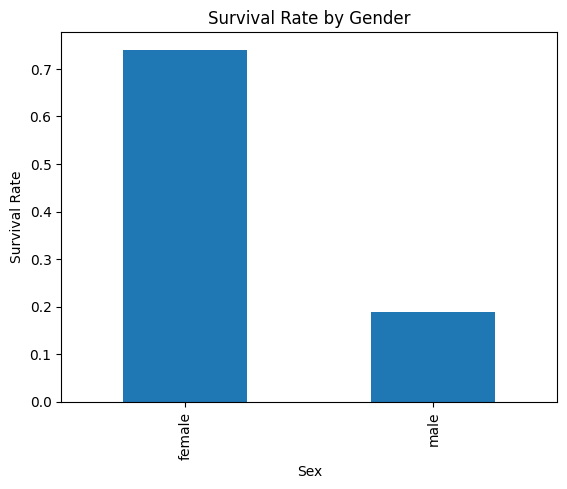

In [6]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
survival_by_gender.plot(kind='bar', title="Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

# Q3: How did passenger class affect survival rate?

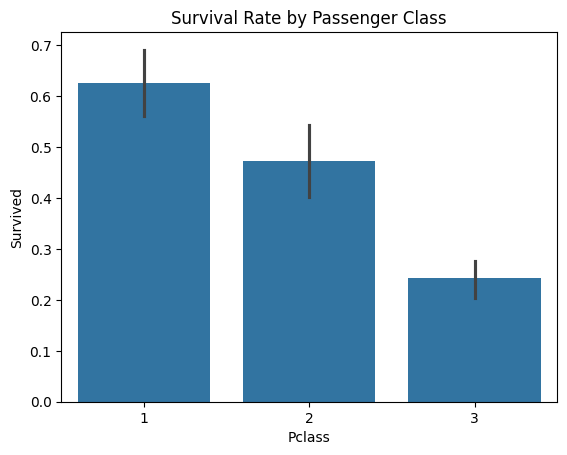

In [8]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Q4: Were younger passengers more likely to survive?

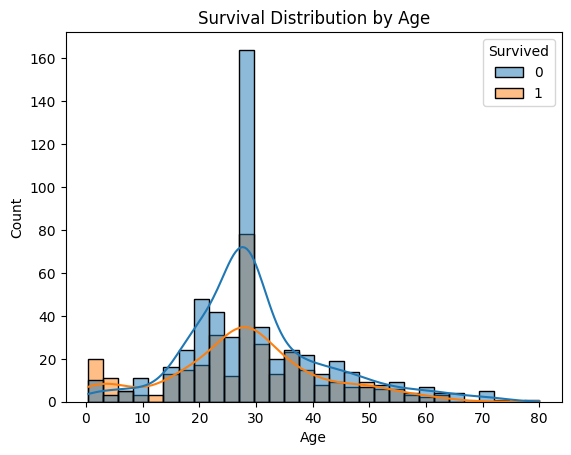

In [9]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title("Survival Distribution by Age")
plt.show()

# Q5: Did the number of family members onboard affect survival?

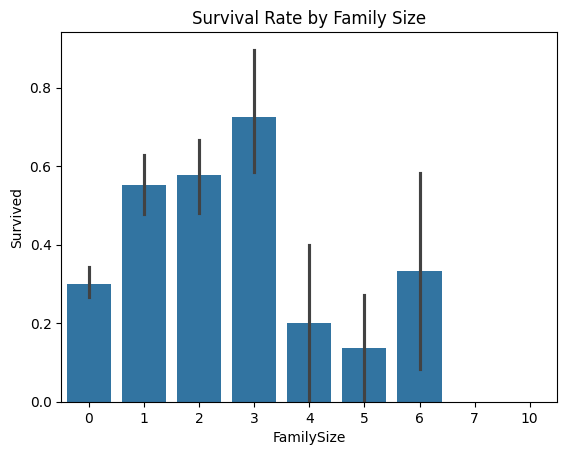

In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()

# Q6: Was there a survival difference based on port of embarkation?

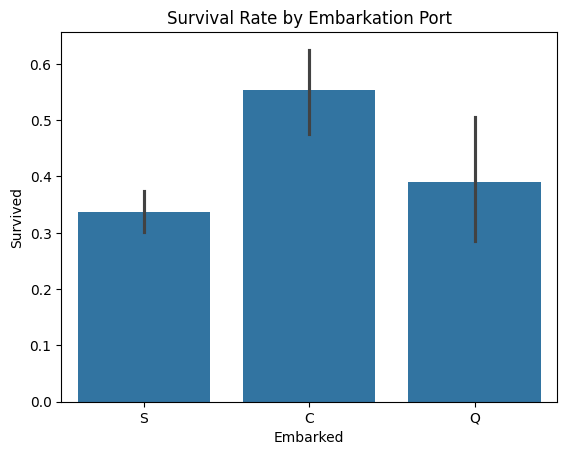

In [11]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarkation Port")
plt.show()

# Key Findings 
Survival rates were significantly higher for women than for men, exceeding 70%;

First class passengers had the highest survival rate, suggesting that there may have been class differences in the rescue process;

Children (<15 years of age) had a slightly higher, but not significant, survival rate;

Passengers with 1-3 family members accompanying them had higher survival rates and may have been more likely to be helped;

Passengers embarking from Cherbourg (C) had a slightly higher survival rate than other ports.

These analyses suggest that social factors such as gender, cabin class, and number of accompanying passengers have a significant impact on the chances of survival.
